# Get an image dataset easily

Torch provides many small datasets for rapid model testing:

https://pytorch.org/vision/main/datasets.html

Also the CIFAR10 dataset:

https://www.cs.toronto.edu/~kriz/cifar.html

In [1]:
import torchvision

# Downloading the CIFAR10 dataset will take up about 170MB on your harddisk
download_folder = "./data"
trainset = torchvision.datasets.CIFAR10(root=download_folder, train=True, download=True)
testset = torchvision.datasets.CIFAR10(root=download_folder, train=False, download=True)

# Display an example image and label

In [2]:
type(trainset)

torchvision.datasets.cifar.CIFAR10

In [3]:
trainset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [4]:
trainset.class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [5]:
type( trainset.data )

numpy.ndarray

In [6]:
trainset.data.shape

(50000, 32, 32, 3)

In [7]:
testset.data.shape

(10000, 32, 32, 3)

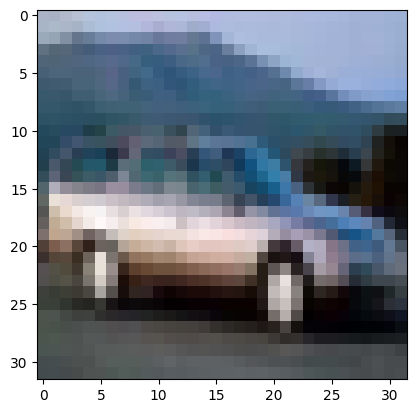

In [8]:
import matplotlib.pyplot as plt
plt.imshow( trainset.data[4] )
plt.show()

In [9]:
img, label = trainset[4]

In [10]:
type(img)

PIL.Image.Image

In [11]:
import numpy as np
img_as_nparray = np.array(img)

In [12]:
img_as_nparray.shape

(32, 32, 3)

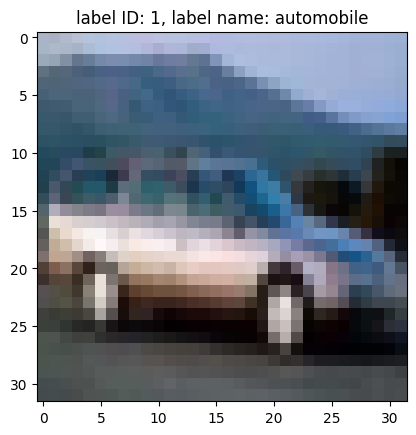

In [13]:
import matplotlib.pyplot as plt
plt.imshow( img )
plt.title( f"label ID: {label}, label name: {trainset.classes[label]}" )
plt.show()

# Display a grid of example images

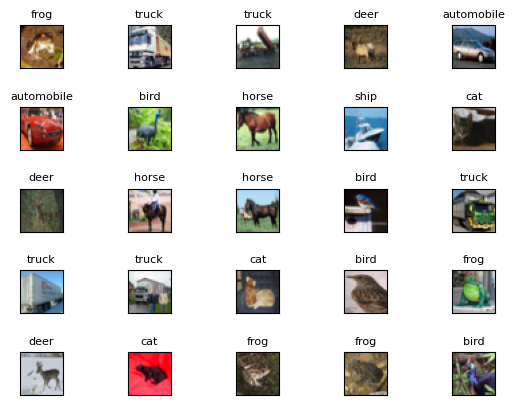

In [14]:
import matplotlib.pyplot as plt

for idx in range(25):
    
    img, label = trainset[idx]

    plt.subplot(5,5, idx+1)
    plt.imshow( img )
    plt.xticks([])
    plt.yticks([])
    plt.title( f"{trainset.classes[label]}", fontsize=8 )

# units here are relative to height and width of a subplot
plt.subplots_adjust(hspace=0.9, wspace=0.7)
plt.show()

# Save images to folders

In [15]:
import shutil
shutil.rmtree("cifar10_images")

In [16]:
import os

def save_images(dataset, rootfolder):
    
    os.makedirs(rootfolder, exist_ok=True)

    # make subdirs
    for class_name in dataset.classes:
        folder = f"{rootfolder}/{class_name}"
        os.makedirs(folder, exist_ok=True)

    # count nr of images per class
    img_counter = {class_name : 0 for class_name in dataset.classes}

    # save each image in its corresponding folder
    for img, label in dataset:
        class_name = dataset.classes[label]                
        img_counter[class_name] += 1
        img_fname = f"{rootfolder}/{class_name}/{img_counter[class_name]:04}.png"
        img.save(img_fname)

    return img_counter

In [17]:
img_counters = save_images(trainset, "cifar10_images/train")
print("Training images:")
print(img_counters)

Training images:
{'airplane': 5000, 'automobile': 5000, 'bird': 5000, 'cat': 5000, 'deer': 5000, 'dog': 5000, 'frog': 5000, 'horse': 5000, 'ship': 5000, 'truck': 5000}


In [18]:
img_counters = save_images(testset, "cifar10_images/test")
print("Test images:")
print(img_counters)

Test images:
{'airplane': 1000, 'automobile': 1000, 'bird': 1000, 'cat': 1000, 'deer': 1000, 'dog': 1000, 'frog': 1000, 'horse': 1000, 'ship': 1000, 'truck': 1000}


# Helper classes in PyTorch to feed a CNN with images

In [19]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

img_transform = transforms.Compose([transforms.ToTensor()])

train_dataset = datasets.ImageFolder(root="cifar10_images/train", transform=img_transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = datasets.ImageFolder(root="cifar10_images/test", transform=img_transform)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [20]:
type(train_dataset)

torchvision.datasets.folder.ImageFolder

In [21]:
len(train_dataset)

50000

In [22]:
train_dataset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [23]:
train_dataset.imgs[:10]

[('cifar10_images/train/airplane/0001.png', 0),
 ('cifar10_images/train/airplane/0002.png', 0),
 ('cifar10_images/train/airplane/0003.png', 0),
 ('cifar10_images/train/airplane/0004.png', 0),
 ('cifar10_images/train/airplane/0005.png', 0),
 ('cifar10_images/train/airplane/0006.png', 0),
 ('cifar10_images/train/airplane/0007.png', 0),
 ('cifar10_images/train/airplane/0008.png', 0),
 ('cifar10_images/train/airplane/0009.png', 0),
 ('cifar10_images/train/airplane/0010.png', 0)]

In [24]:
train_dataset.targets[:10], train_dataset.targets[-5:]

([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [9, 9, 9, 9, 9])

In [25]:
type(train_loader)

torch.utils.data.dataloader.DataLoader

In [26]:
len(train_loader)

782

In [27]:
len(train_dataset) / train_loader.batch_size

781.25

In [28]:
for img, label in train_loader:
    print(img.shape)
    print(label.shape)
    break

torch.Size([64, 3, 32, 32])
torch.Size([64])


In [29]:
img[0]

tensor([[[0.8078, 0.9020, 0.9059,  ..., 0.9216, 0.6980, 0.4980],
         [0.8118, 0.9294, 0.9608,  ..., 0.9137, 0.6510, 0.4902],
         [0.8431, 0.9569, 0.9765,  ..., 0.8824, 0.6000, 0.5020],
         ...,
         [0.0078, 0.0078, 0.0078,  ..., 0.7255, 0.6431, 0.5098],
         [0.0118, 0.0118, 0.0078,  ..., 0.9922, 0.9647, 0.9020],
         [0.0157, 0.0118, 0.0118,  ..., 0.9882, 0.9804, 0.9882]],

        [[0.6000, 0.7020, 0.7059,  ..., 0.9608, 0.6706, 0.2275],
         [0.5922, 0.7137, 0.7529,  ..., 0.9725, 0.5608, 0.2039],
         [0.5804, 0.6902, 0.7412,  ..., 0.9333, 0.4588, 0.2078],
         ...,
         [0.0157, 0.0157, 0.0157,  ..., 0.8314, 0.7725, 0.6902],
         [0.0196, 0.0196, 0.0196,  ..., 1.0000, 0.9765, 0.9333],
         [0.0235, 0.0196, 0.0196,  ..., 0.9922, 0.9804, 0.9882]],

        [[0.5725, 0.7176, 0.7176,  ..., 0.8314, 0.5529, 0.2000],
         [0.5490, 0.7216, 0.7725,  ..., 0.8471, 0.4588, 0.1725],
         [0.5176, 0.6745, 0.7333,  ..., 0.8157, 0.3765, 0.

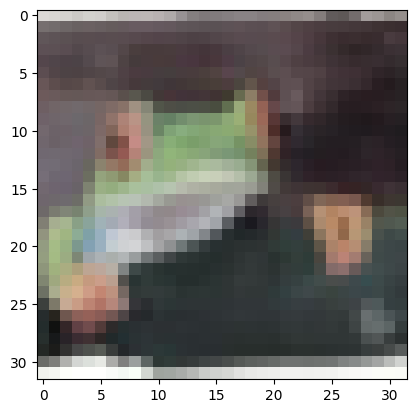

In [30]:
import matplotlib.pyplot as plt
plt.imshow(img[4].permute(1,2,0))
plt.show()

In [31]:
len(test_dataset)

10000

In [32]:
for img, label in test_loader:
    print(img.shape)
    print(label.shape)
    break

torch.Size([64, 3, 32, 32])
torch.Size([64])


In [33]:
label

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Define a CNN with PyTorch

Variant #1: Compute the input dimension for the MLP by yourself

In [34]:
import torch
import torch.nn as nn

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)        
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 8 * 8, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(x.shape[0], -1)  # Flatten
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

Variant #2: Use a dummy tensor to compute the dimension for the MLP

In [35]:
t = (1,2,3)

In [36]:
def f(x,y,z):
    return x+y+z

In [37]:
f(*t)

6

In [38]:
import torch
import torch.nn as nn

class SimpleCNN(nn.Module):
    def __init__(self, input_shape=(3, 32, 32)):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)

        # Automatische Berechnung der Flatten-Dimension
        self.flattened_size = self._get_flattened_size(input_shape)
        
        self.fc1 = nn.Linear(self.flattened_size, 256)
        self.fc2 = nn.Linear(256, 10)

    def _get_flattened_size(self, input_shape):        
        with torch.no_grad():
            x = torch.zeros(1, *input_shape)  # Dummy-Input mit gegebener Eingangsgröße
            x = self._feature_extractor(x)   # Durch Convolution und Pooling leiten
            return x.view(1, -1).shape[1]

    def _feature_extractor(self, x):        
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        return x

    def forward(self, x):
        x = self._feature_extractor(x)
        x = x.view(x.shape[0], -1)  # Flatten
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Modell initialisieren
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)

In [39]:
!pip install torchinfo

In [40]:
from torchinfo import summary

summary(model, input_size=(1, 3, 32, 32))  # Batchgröße 1, 3 Kanäle, 32x32 Bildgröße

Layer (type:depth-idx)                   Output Shape              Param #
SimpleCNN                                [1, 10]                   --
├─Conv2d: 1-1                            [1, 32, 32, 32]           896
├─MaxPool2d: 1-2                         [1, 32, 16, 16]           --
├─Conv2d: 1-3                            [1, 64, 16, 16]           18,496
├─MaxPool2d: 1-4                         [1, 64, 8, 8]             --
├─Linear: 1-5                            [1, 256]                  1,048,832
├─Linear: 1-6                            [1, 10]                   2,570
Total params: 1,070,794
Trainable params: 1,070,794
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 6.70
Input size (MB): 0.01
Forward/backward pass size (MB): 0.40
Params size (MB): 4.28
Estimated Total Size (MB): 4.69

# Train the CNN!

In [41]:
import torch.optim as optim

# Define loss and otimizer to be used
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
nr_epochs = 5
for epoch in range(nr_epochs):
    running_loss = 0.0
    batch_nr = 0
    for images, labels in train_loader:
        batch_nr += 1
        if batch_nr % 50 == 0:
            print(f"{batch_nr}", end=" ")        
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
    print(f"\nEpoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}")

print("Training finished!")

50 100 150 200 250 300 350 400 450 500 550 600 650 700 750 
Epoch 1, Loss: 1.4255
50 100 150 200 250 300 350 400 450 500 550 600 650 700 750 
Epoch 2, Loss: 1.0464
50 100 150 200 250 300 350 400 450 500 550 600 650 700 750 
Epoch 3, Loss: 0.8770
50 100 150 200 250 300 350 400 450 500 550 600 650 700 750 
Epoch 4, Loss: 0.7621
50 100 150 200 250 300 350 400 450 500 550 600 650 700 750 
Epoch 5, Loss: 0.6643
Training finished!


# Test the CNN

In [42]:
model.eval()

for images, labels in test_loader:
    images, labels = images.to(device), labels.to(device)

    # Keine Gradientenberechnung während der Vorhersage
    with torch.no_grad():
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

    print(predicted)
    print(labels)
    break

tensor([0, 0, 2, 0, 0, 5, 9, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 8, 0, 0, 0, 0, 7,
        0, 8, 0, 8, 0, 0, 0, 0, 9, 8, 0, 0, 0, 0, 0, 8, 0, 9, 8, 0, 0, 0, 5, 8,
        0, 6, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 9, 9, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


tensor([0, 0, 2, 0, 0, 5, 9, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 8, 0, 0, 0, 0, 7,
        0, 8, 0, 8, 0, 0, 0, 0, 9, 8, 0, 0, 0, 0, 0, 8, 0, 9, 8, 0, 0, 0, 5, 8,
        0, 6, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 9, 9, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


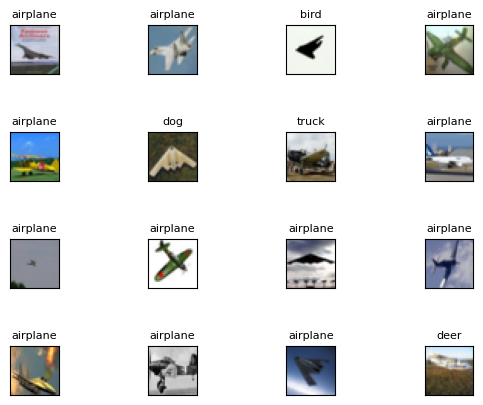

In [43]:
model.eval()

for images, labels in test_loader:
    images, labels = images.to(device), labels.to(device)

    # no gradient calculation during prediction
    with torch.no_grad():
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

    # assuming that the batch_size is at least 16
    for idx in range(4*4):
        plt.subplot(4,4,idx+1)
        plt.subplot(4,4, idx+1)
        plt.imshow( images[idx].permute(1,2,0) )
        plt.xticks([])
        plt.yticks([])
        
        predicted_id = predicted[idx]
        plt.title( f"{train_dataset.classes[predicted_id]}", fontsize=8 )

    # units here are relative to height and width of a subplot
    plt.subplots_adjust(hspace=1.2, wspace=0.7)
        
    print(predicted)
    print(labels)
    break